[View in Colaboratory](https://colab.research.google.com/github/chantera/primitiv-colaboratory/blob/master/primitiv_colaboratory_tutorial.ipynb)

# 9-step tutorial of *primitiv*: solving the XOR problem

## 0. Installs primitiv

In [1]:
!apt update -q
!apt install -y -q ninja-build cuda-libraries-dev-9.2
!pip install -q numpy cython cmake scikit-build
!pip install -q primitiv==0.4.0.dev213 \
     --global-option=build_ext \
     --global-option=-L/usr/local/cuda-9.2/lib64 \
     --global-option=--enable-cuda

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 247 kB in 2s (158 kB/s)
Reading package lists...
Building dependency tree...
Reading state information...
12 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state inf

## 1. Imports modules.

In [2]:
!apt install -y -q graphviz
!pip install -q graphviz
from graphviz import Source
import numpy as np

from primitiv import *
from primitiv import functions as F

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


## 2. Defines a default device and a default computation graph.

In [0]:
dev = devices.CUDA(0); Device.set_default(dev)
# if you want to activate CPU backend, just replacing above with:
# dev = devices.Naive(); Device.set_default(dev)
# or:
# dev = devices.Eigen(); Device.set_default(dev)
g = Graph(); Graph.set_default(g)

## 3. Defines parameters to be optimized.

In [0]:
w1 = Parameter([8, 2], initializers.XavierUniform())
b1 = Parameter([8], initializers.Constant(0))
w2 = Parameter([1, 8], initializers.XavierUniform())
b2 = Parameter([1], initializers.Constant(0))

## 4. Defines an optimizer.

In [0]:
opt = optimizers.SGD()
opt.add(w1, b1, w2, b2)

## 5. Prepares input/output samples.

In [0]:
# Input 1: list of ndarrays.
inputs = [
    np.array([ 1,  1]),  # 1st sample
    np.array([ 1, -1]),  # 2nd sample
    np.array([-1,  1]),  # 3rd sample
    np.array([-1, -1]),  # 4th sample
]

# Input 2: list of raw float values.
labels = [1, -1, -1, 1]

## 6. Defines an actual graph structure.

In [0]:
def build_graph():
    # Input
    # F.input() takes an ndarray, or a list of ndarrays.
    x = F.input(inputs)
    
    # Calculating outputs by 2-layer perceptron.
    h = F.tanh(F.parameter(w1) @ x + F.parameter(b1))
    y = F.tanh(F.parameter(w2) @ h + F.parameter(b2))
    
    # Ground truth
    # F.raw_input() takes a shape and a corresponding list of
    # raw float values with column-major order.
    t = F.raw_input(Shape([1], 4), labels)
    
    # Calculating loss by squared error.
    diff = y - t
    loss = F.batch.sum(diff * diff)
    
    return y, loss

## 7. Dumps the graph structure.

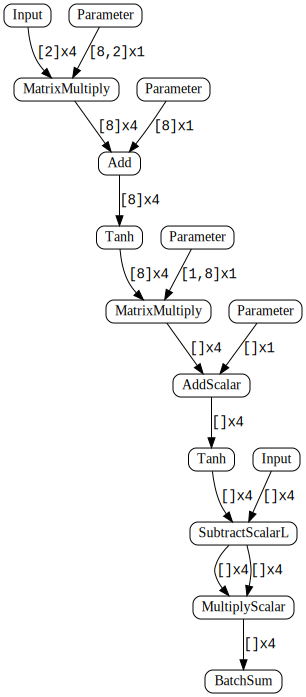

In [8]:
g.clear()
build_graph()
Source(g.dump("dot"))

## 8. Performs the training loop.

In [9]:
for i in range(20):
    # Constructs the graph.
    g.clear()
    y, loss = build_graph()
    
    # Calculates values
    y_vals = y.to_list()
    loss_val = loss.to_float()
    print("y =", "[" + ", ".join("%+.8f" % x for x in y_vals) + "], loss =", "%.8f" % loss_val)
    
    # Train
    opt.reset_gradients()
    loss.backward()
    opt.update()

y = [+0.16685486, -0.67652214, +0.67652214, -0.16685486], loss = 4.97104549
y = [+0.25149074, +0.08853039, +0.44756424, +0.50954020], loss = 4.08115768
y = [+0.14997287, -0.39876923, +0.01388901, -0.08798395], loss = 3.29570436
y = [+0.16787529, -0.00632943, -0.21650332, +0.26411158], loss = 2.83521152
y = [+0.32135800, -0.49942562, -0.07637559, +0.08251421], loss = 2.40599179
y = [+0.27840698, -0.18051286, -0.35828522, +0.37379885], loss = 1.99618149
y = [+0.49367085, -0.61976331, -0.20462814, +0.21143343], loss = 1.65540290
y = [+0.38383043, -0.34524575, -0.49392632, +0.48958123], loss = 1.32500601
y = [+0.61651027, -0.67073792, -0.35090408, +0.36949077], loss = 1.07434523
y = [+0.51589978, -0.51893210, -0.57372993, +0.55198014], loss = 0.84820729
y = [+0.66131127, -0.67143214, -0.50472271, +0.52757239], loss = 0.69115436
y = [+0.63583994, -0.64295983, -0.61133802, +0.59545213], loss = 0.57480735
y = [+0.68672210, -0.69008404, -0.61065090, +0.62075579], loss = 0.48960984
y = [+0.7009